In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [44]:
# Cargar los datos del Titanic
path='/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M1/titanic.csv'
all_data= pd.read_csv(path)

In [5]:
!pip install en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.1.7
    Uninstalling spacy-3.1.7:
      Successfully uninstalled spacy-3.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
es-core-news-sm 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 3.7.4 which is incompatible.


In [4]:
# Cargar el modelo de lenguaje de spaCy para procesar nombres en inglés
nlp = spacy.load("en_core_web_sm")

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# Función para procesar y limpiar los nombres utilizando spaCy
def process_names(name):
  doc = nlp(name)
  #text = doc.text
  tokens = word_tokenize(doc)
  return tokens

In [43]:
# Aplicar la función a cada nombre y combinar los tokens en una lista
all_data['Name_Tokens'] = all_data['Name'].apply(process_names) #Dentro del parentesis() deberá añadir el process_names

TypeError: expected string or bytes-like object

In [33]:
all_tokens = [token for name_tokens in all_data['Name_Tokens'] for token in name_tokens]

In [34]:
all_tokens

['Braund',
 ',',
 'Mr.',
 'Owen',
 'Harris',
 'Cumings',
 ',',
 'Mrs.',
 'John',
 'Bradley',
 '(',
 'Florence',
 'Briggs',
 'Thayer',
 ')',
 'Heikkinen',
 ',',
 'Miss',
 '.',
 'Laina',
 'Futrelle',
 ',',
 'Mrs.',
 'Jacques',
 'Heath',
 '(',
 'Lily',
 'May',
 'Peel',
 ')',
 'Allen',
 ',',
 'Mr.',
 'William',
 'Henry',
 'Moran',
 ',',
 'Mr.',
 'James',
 'McCarthy',
 ',',
 'Mr.',
 'Timothy',
 'J',
 'Palsson',
 ',',
 'Master',
 '.',
 'Gosta',
 'Leonard',
 'Johnson',
 ',',
 'Mrs.',
 'Oscar',
 'W',
 '(',
 'Elisabeth',
 'Vilhelmina',
 'Berg',
 ')',
 'Nasser',
 ',',
 'Mrs.',
 'Nicholas',
 '(',
 'Adele',
 'Achem',
 ')',
 'Sandstrom',
 ',',
 'Miss',
 '.',
 'Marguerite',
 'Rut',
 'Bonnell',
 ',',
 'Miss',
 '.',
 'Elizabeth',
 'Saundercock',
 ',',
 'Mr.',
 'William',
 'Henry',
 'Andersson',
 ',',
 'Mr.',
 'Anders',
 'Johan',
 'Vestrom',
 ',',
 'Miss',
 '.',
 'Hulda',
 'Amanda',
 'Adolfina',
 'Hewlett',
 ',',
 'Mrs.',
 '(',
 'Mary',
 'D',
 'Kingcome',
 ')',
 'Rice',
 ',',
 'Master',
 '.',
 'Eugene'

In [35]:
# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)
word_freq

Counter({'Braund': 2,
         ',': 891,
         'Mr.': 516,
         'Owen': 2,
         'Harris': 5,
         'Cumings': 1,
         'Mrs.': 125,
         'John': 44,
         'Bradley': 2,
         '(': 144,
         'Florence': 5,
         'Briggs': 1,
         'Thayer': 4,
         ')': 144,
         'Heikkinen': 1,
         'Miss': 182,
         '.': 240,
         'Laina': 1,
         'Futrelle': 2,
         'Jacques': 3,
         'Heath': 2,
         'Lily': 2,
         'May': 2,
         'Peel': 1,
         'Allen': 2,
         'William': 64,
         'Henry': 35,
         'Moran': 3,
         'James': 24,
         'McCarthy': 1,
         'Timothy': 2,
         'J': 8,
         'Palsson': 4,
         'Master': 40,
         'Gosta': 1,
         'Leonard': 9,
         'Johnson': 6,
         'Oscar': 2,
         'W': 2,
         'Elisabeth': 4,
         'Vilhelmina': 1,
         'Berg': 1,
         'Nasser': 2,
         'Nicholas': 2,
         'Adele': 2,
         'Achem': 1,
   

In [36]:
# Seleccionar las palabras más comunes
common_words = word_freq.most_common() #Seleccione el número de las palabras comunes: se recomienda 20, para ver los nombres mas reptidos segun su frecuencia.
common_words

[(',', 891),
 ('Mr.', 516),
 ('.', 240),
 ('Miss', 182),
 ('(', 144),
 (')', 144),
 ('Mrs.', 125),
 ('William', 64),
 ('``', 53),
 ("''", 53),
 ('John', 44),
 ('Master', 40),
 ('Henry', 35),
 ('James', 24),
 ('George', 24),
 ('Charles', 23),
 ('Thomas', 22),
 ('Mary', 20),
 ('Edward', 18),
 ('Anna', 17),
 ('Joseph', 16),
 ('Elizabeth', 15),
 ('Johan', 15),
 ('Frederick', 15),
 ('Richard', 14),
 ('Samuel', 13),
 ('Arthur', 13),
 ('Margaret', 12),
 ('Alfred', 12),
 ('Maria', 11),
 ('Alexander', 11),
 ('Peter', 11),
 ('Robert', 10),
 ('Jr', 10),
 ('Leonard', 9),
 ('Andersson', 9),
 ('Ernest', 9),
 ('Karl', 9),
 ('J', 8),
 ('Annie', 8),
 ('H', 8),
 ('Albert', 8),
 ('Martin', 8),
 ('Victor', 8),
 ('Alice', 8),
 ('Helen', 7),
 ('Frank', 7),
 ('David', 7),
 ('Sage', 7),
 ('Kate', 7),
 ('Dr.', 7),
 ('de', 7),
 ('Catherine', 7),
 ('Johnson', 6),
 ('E', 6),
 ('Marie', 6),
 ('Panula', 6),
 ('Goodwin', 6),
 ('Skoog', 6),
 ('Francis', 6),
 ('Elias', 6),
 ('Sofia', 6),
 ('Rev', 6),
 ('Edith', 6),
 (

<ipython-input-38-e8d21feec056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')


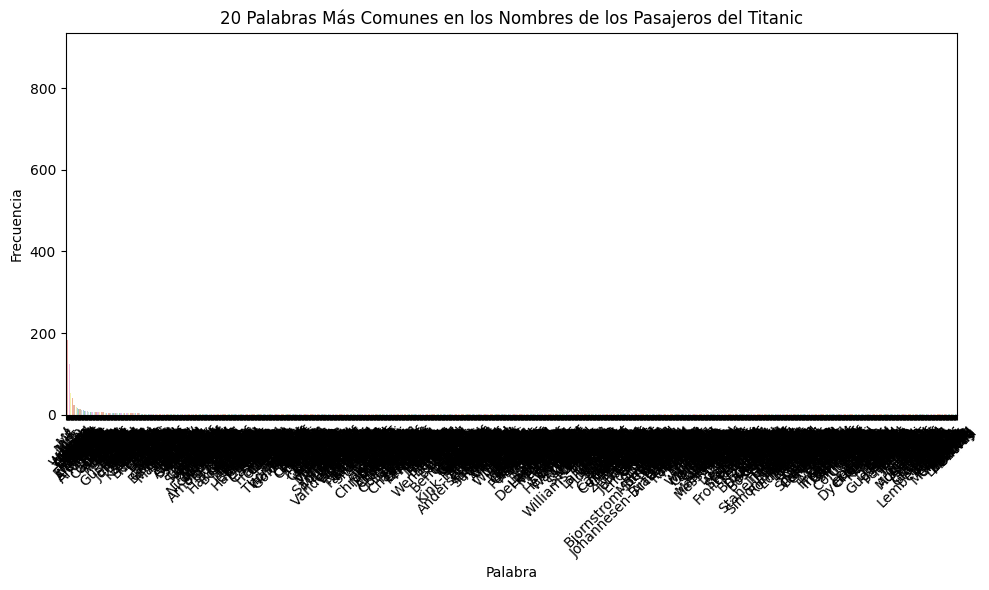

In [38]:
# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')
plt.title('20 Palabras Más Comunes en los Nombres de los Pasajeros del Titanic')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()